Part 2 of the project. To be submitted by **08/11/2024 23:59**

-> Total = **50** pts

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Datasets</h1>

In [2]:
### 1- Load the dataset "dataset"
### This dataset should be the app_train from the question 6.a of part 1 (Refer to correction if need be). You can include the previous notebook here, but we recommend instead you export it from previous notebook then load it here.

import pandas as pd

my_dataset = pd.read_csv('../data/app_train_transformed_project1.csv')

#A/ Processing the provided dataset  (review from past assignment, 7 pts)

**1.** Process the categorical features to be correctly handled. Use the most appropriate methods from sklearn (**2** pts)

**2.** Process the anomalies of the dataset (**1** pt)

**3.** Expand the 5 most important features (justify what 'important' means for you) using PolynomialFeatures (**2** pts). You may need to process missing values before.

**4.** Process the features using the best Scaler (**2** pts)

## Data Preprocessing Steps

### Handling Missing Values

#### a) Identification
- Calculated the percentage of missing values in each column for all datasets (`app_train`, `app_test`, `bureau`, `app_past`).
- Listed columns with the most missing values.

#### b) Column Removal
- Dropped columns with more than **30% missing values** from `app_train` and `app_test`.

#### c) Categorical Features
- For categorical columns (type `object`) with missing values, replaced missing entries with the label **`Missing`**.
- Ensured consistent transformations across `app_train` and `app_test`.

#### d) Numerical Features
- Replaced missing values in numerical columns (type `float64`) with the **median** of the respective column.

---

### Handling Class Imbalance

#### a) Undersampling
- Reduced the majority class in the target column of `app_train` by randomly selecting samples to match the size of the minority class.

#### b) Oversampling
- Duplicated samples from the minority class until its size matched the majority class.

---

Feature Transformation

#### a) Reducing Categories
- **`NAME_HOUSING_TYPE`**:
  - Grouped less frequent categories into a single category: **`Other`**.
  - Kept the following categories: **`House / apartment`** and **`With parents`**.
  - Applied **One-Hot Encoding** to convert the categories into binary columns.

#### b) Label Encoding
- **`CODE_GENDER`**:
  - Encoded as **0 (`F`)**, **1 (`M`)**, and **2 (`XNA`)**.
- **`FLAG_OWN_CAR`**:
  - Transformed into binary values: **`Y` -> 1**, **`N` -> 0**.

#### c) Thresholding
- **`ORGANIZATION_TYPE`**:
  - Retained categories appearing in more than **10%** of the dataset.
  - Grouped all other categories into a single category: **`Other`**.
  - Applied **One-Hot Encoding** afterward.

#### d) One-Hot Encoding
- Applied **One-Hot Encoding** to remaining categorical columns in the following datasets:
  - **`app_train`**
  - **`app_test`**
  - **`bureau`**
  - **`app_past`**
- Ensured consistent encoding between training and test datasets:
  - Added missing columns in the test set with a default value of **0**.
  - Reordered columns to match the training set.
#### f) Remaining Categorical Features
   - Applied One-Hot Encoding consistently across all datasets.
   - Ensured alignment of columns between training and test datasets by adding missing columns in the test set as **0** and reordering.

---

### Handling Anomalies

#### a) **`DEF_30_CNT_SOCIAL_CIRCLE`**
- Identified outliers (e.g., values > 99th percentile).
- Capped values at the **99th percentile**.

#### b) **`AMT_INCOME_TOTAL`**
- Identified extreme outliers (e.g., maximum value was an order of magnitude above the 75th percentile).
- Capped values at the **99th percentile**.

#### c) **`DAYS_EMPLOYED`**
- Replaced the placeholder value **`365243`** (an anomaly) with the median of valid entries.

---

### Final Processing and Saving
- Applied consistent transformations to the **test set (`app_test`)**, **bureau dataset (`bureau`)**, and **previous applications dataset (`app_past`)** using thresholds and mappings derived from the training data.
- Saved the cleaned and transformed datasets as CSV files for downstream analysis:
  - **`app_train_transformed_project1.csv`**
  - **`app_test_transformed_project1.csv`**

We loaded `app_train_transformed_project1` to continue to do Project 2.


In [3]:
my_dataset.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [4]:
# Convert all boolean columns to integers
my_dataset = my_dataset.astype({col: int for col in my_dataset.select_dtypes('bool').columns})

print("Dtypes after conversion:")
print(my_dataset.dtypes.unique())

Dtypes after conversion:
[dtype('int64') dtype('float64')]


In [5]:
my_dataset.shape

(565372, 99)

In [6]:
my_dataset.isnull().sum().sum()

0

In [7]:
my_dataset.columns

Index(['SK_ID_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUM

In [8]:
from sklearn.model_selection import train_test_split

X = my_dataset.drop(columns=['TARGET'])
y = my_dataset['TARGET']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Extract feature importances and select the top 5 features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_5_features = importances.nlargest(5).index.tolist()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,0.622246,0.535276,-16765,-1188,-291
1,0.555912,0.729567,-19046,-225,-2531
2,0.650442,0.535276,-19005,-3039,-2437
3,0.322738,0.535276,-19932,-3038,-3458
4,0.354225,0.621226,-16941,-1588,-477
...,...,...,...,...,...
565367,0.150685,0.535276,-20517,-1430,-3990
565368,0.006493,0.488455,-15819,-1646,-4893
565369,0.093748,0.225087,-14601,-2991,-428
565370,0.294801,0.535276,-15446,-341,-4826


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Extract the top 5 features from the training set
X_top_5_train = X_train[top_5_features]

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_top_5_train)

poly_feature_names = poly.get_feature_names_out(top_5_features)
X_poly_train_df = pd.DataFrame(X_poly_train, columns=poly_feature_names)
print(X_poly_train_df.head())

   EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0      0.146590      0.232725     -9877.0         -252.0          -1504.0   
1      0.448285      0.420611    -12823.0        -1275.0          -1115.0   
2      0.543604      0.146442    -15075.0         -161.0          -4428.0   
3      0.007952      0.177704    -21317.0        -1430.0          -4026.0   
4      0.649257      0.535276    -11201.0        -3137.0          -3326.0   

   EXT_SOURCE_2^2  EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 DAYS_BIRTH  \
0        0.021489                   0.034115             -1447.868624   
1        0.200959                   0.188553             -5748.355779   
2        0.295505                   0.079607             -8194.832304   
3        0.000063                   0.001413              -169.517334   
4        0.421535                   0.347532             -7272.332543   

   EXT_SOURCE_2 DAYS_EMPLOYED  EXT_SOURCE_2 DAYS_ID_PUBLISH  EXT_SOURCE_3^2  \
0                  

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#B/ Basic Machine Learning (8 pts)

In the following, you will use a split of my_dataset between train and validation. The metrics will be evaluated on the validation set.

**5.** Following the lecture and Random Forest example compare the performance of a Random Forest Classifier and a Logistic Regression Classifier:

**5.1** Scale the features (only for Logistic Regression) (**1** pt)

**5.2** Train a Logistic Regression with C = 0.0001  (**1** pt)

**5.3** Evaluate the performance metrics of the Logistic Regression. Which ones are relevant and which are not? (**2** pts)

**5.4** Train a Random Forest Classifier with 100 estimators and the default max_depth (**2** pts)

**5.5** Evaluate the performance metrics of the Random Forest. Which ones are relevant and which are not? (**2** pts)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_lr = scaler.fit_transform(X_train)
X_val_scaled_lr = scaler.transform(X_val)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with C = 0.0001
log_reg = LogisticRegression(C=0.0001, max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled_lr, y_train)

LogisticRegression(C=0.0001, max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the validation set
y_val_pred_lr = log_reg.predict(X_val_scaled_lr)

# Calculate metrics
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
precision_lr = precision_score(y_val, y_val_pred_lr)
recall_lr = recall_score(y_val, y_val_pred_lr)
f1_lr = f1_score(y_val, y_val_pred_lr)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

Logistic Regression Metrics:
Accuracy: 0.6779
Precision: 0.6796
Recall: 0.6724
F1 Score: 0.6760


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_val_pred_rf = rf_model.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Random Forest Metrics:
Accuracy: 0.9985
Precision: 0.9971
Recall: 1.0000
F1 Score: 0.9985


#C/ Machine Learning Hyper-parameter optimization (10 pts)

**6.** Use a grid-search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.1** Use a random search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model.  (you can do a search manually with a loop or use Scikit-learn grid search features) (**2** pts)

**7.2** How many random iterations are needed to find performances as good as your previous grid search? (**2** pts)


**8.1** Plot how the performance metric selected in 5.5 changes when changing the number of estimators? When changing the depth of the trees (max 10)? (**2** pts)

**8.2** What are the optimal values of these parameters (optimized together)? (**2** pts)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for C and class_weight
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],  # Regularization strength values
    'class_weight': [None, 'balanced']  # Testing with and without balancing
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit GridSearchCV on the scaled training data for Logistic Regression
grid_search.fit(X_train_scaled_lr, y_train)

# Get the best parameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score from Grid Search:", best_score)

Best Parameters: {'C': 10, 'class_weight': None}
Best F1 Score from Grid Search: 0.678705295180724


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

# Define the parameter distribution for C (loguniform allows for random sampling over orders of magnitude)
param_distributions = {
    'C': loguniform(1e-5, 1e2),  # Log-uniform distribution from 0.00001 to 100
    'class_weight': [None, 'balanced']  # Trying both with and without balancing
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# seting up RandomizedSearchCV with 5-fold cross-validation, searching over 20 random combinations
random_search = RandomizedSearchCV(estimator=log_reg, 
                                   param_distributions=param_distributions, 
                                   scoring='f1', 
                                   cv=5, 
                                   n_iter=20,  # number of random combinations to try
                                   random_state=42, 
                                   n_jobs=-1)

random_search.fit(X_train_scaled_lr, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters from Random Search:", best_params_random)
print("Best F1 Score from Random Search:", best_score_random)

Best Parameters from Random Search: {'C': 0.013207763079904542, 'class_weight': None}
Best F1 Score from Random Search: 0.6787677801471489


In [ ]:
import numpy as np

# Best F1 score obtained from the grid search
target_f1_score = best_score

# Track performance as we increase the number of iterations
iterations_needed = 0
found_equivalent_performance = False

for n in range(1, 50):  # Loop up to 50 iterations
    # Perform RandomizedSearchCV with `n_iter` random samples
    random_search = RandomizedSearchCV(
        estimator=log_reg,
        param_distributions=param_distributions,
        scoring='f1',
        cv=5,
        n_iter=n,
        random_state=42,
        n_jobs=-1
    )
    
    random_search.fit(X_train_scaled_lr, y_train)
    
    # Check if the F1 score meets or exceeds the target from grid search
    if random_search.best_score_ >= target_f1_score:
        iterations_needed = n
        found_equivalent_performance = True
        break  # Stop if we've reached a comparable performance

if found_equivalent_performance:
    print(f"Comparable performance found with {iterations_needed} random iterations.")
else:
    print("Performance did not match within 50 iterations. Consider increasing the limit.")

Comparable performance found with 4 random iterations.


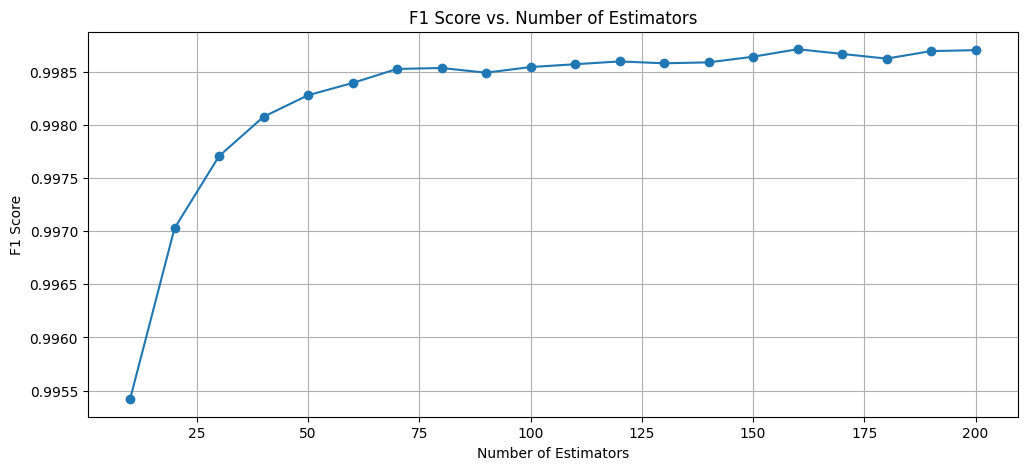

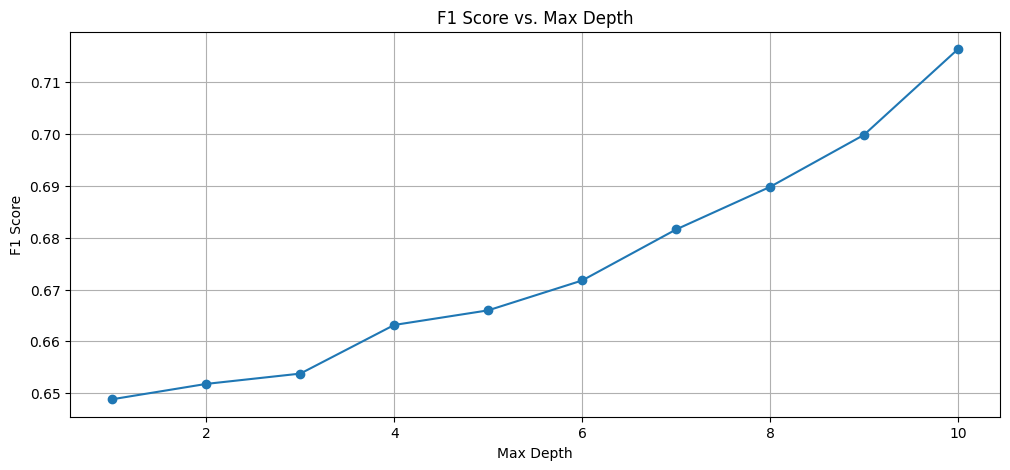

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

f1_scores_estimators = []
f1_scores_depth = []

estimators_range = range(10, 210, 10)  # 10 to 200 in steps of 10
depth_range = range(1, 11) # range of depths to test, max depth capped at 10

# 1. F1 Score vs. Number of Estimators
for n_estimators in estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    f1_scores_estimators.append(f1_score(y_val, y_val_pred))

# 2. F1 Score vs. Max Depth
for max_depth in depth_range:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    f1_scores_depth.append(f1_score(y_val, y_val_pred))

# Plotting F1 Score vs. Number of Estimators
plt.figure(figsize=(12, 5))
plt.plot(estimators_range, f1_scores_estimators, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Estimators')
plt.grid(True)
plt.show()

# Plotting F1 Score vs. Max Depth
plt.figure(figsize=(12, 5))
plt.plot(depth_range, f1_scores_depth, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Max Depth')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': range(10, 210, 10),  # Test values from 10 to 200 in steps of 10
    'max_depth': range(1, 11)            # Test max depths from 1 to 10
}

rf_model = RandomForestClassifier(random_state=42)

# setting up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='f1', 
                           cv=5, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

print("Optimal Parameters:", best_params_rf)
print("Best F1 Score from Grid Search:", best_score_rf)

/Users/mina/Desktop/3rd_semester/Advanced topics in applied Machine Learning/appliedmlenv/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Optimal Parameters: {'max_depth': 10, 'n_estimators': 200}
Best F1 Score from Grid Search: 0.7176834610282852


In [7]:
# we got better results in 5.5 in comparison to grid search, with default value of depth
# we will use the default value of depth in the next steps and n_estimators=200 from the grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest with 200 trees
rf_model_best = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model_best.fit(X_train, y_train)

y_val_pred_rf_best = rf_model_best.predict(X_val)
y_val_pred_rf_proba_best = rf_model_best.predict_proba(X_val)[:, 1]

accuracy_rf_best = accuracy_score(y_val, y_val_pred_rf_best)
precision_rf_best = precision_score(y_val, y_val_pred_rf_best)
recall_rf_best = recall_score(y_val, y_val_pred_rf_best)
f1_rf_best = f1_score(y_val, y_val_pred_rf_best)
auc_rf_best = roc_auc_score(y_val, y_val_pred_rf_proba_best)

print("Best Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")
print(f"AUC Score: {auc_rf_best:.4f}")

Best Random Forest Metrics:
Accuracy: 0.9987
Precision: 0.9974
Recall: 1.0000
F1 Score: 0.9987
AUC Score: 1.0000


As noted, using the default depth showed better results than setting a fixed value, likely due to the complexity of the data benefiting from deeper trees.
Deeper trees allow the model to capture intricate patterns.
`max_depth=None` in Random Forest or Decision Tree mean that the trees can grow until all leaves are pure (i.e., contain samples of only one class) or until the minimum number of samples required to split a node (min_samples_split) is reached.
it Allows the model to fully adapt to the data, capturing all possible patterns. but it has risk of overfitting, especially if the dataset has noise or limited samples.

As we saw, with higher `max_depth` and more `n_estimators`, we have better results. we will check ore values:

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest with 200 trees
rf_model_best = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

rf_model_best.fit(X_train, y_train)

y_val_pred_rf_best = rf_model_best.predict(X_val)
y_val_pred_rf_proba_best = rf_model_best.predict_proba(X_val)[:, 1]

accuracy_rf_best = accuracy_score(y_val, y_val_pred_rf_best)
precision_rf_best = precision_score(y_val, y_val_pred_rf_best)
recall_rf_best = recall_score(y_val, y_val_pred_rf_best)
f1_rf_best = f1_score(y_val, y_val_pred_rf_best)
auc_rf_best = roc_auc_score(y_val, y_val_pred_rf_proba_best)

print("Best Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")
print(f"AUC Score: {auc_rf_best:.4f}")

Best Random Forest Metrics:
Accuracy: 0.9530
Precision: 0.9189
Recall: 0.9936
F1 Score: 0.9548
AUC Score: 0.9946


By limiting the max depth to 20, the Random Forest avoids overfitting, as the model is now constrained from growing overly complex trees.

#D/ Post Machine Learning Feature inteprepretation (5 pts)

**9.1** Get the features importance of the Optimal Random Forest classifier (obtained in 8) (**2** pts)

**9.2** Are they the features that are the most correlated with the target? (**1** pt)

**10.** Compare the tree structure obtained with visualization (using export_graphviz for instance) of the first tree of your random forest and the last tree of your random forest. How can you explain the differences?  (**2** pts)


In [ ]:
import pandas as pd

# Initialize Random Forest with optimal parameters from the grid search
optimal_rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], 
                                    max_depth=best_params_rf['max_depth'], 
                                    random_state=42)

# Train the optimal Random Forest model on the entire training data
optimal_rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = optimal_rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("Feature Importances of the Optimal Random Forest Classifier:")
print(importance_df)

Feature Importances of the Optimal Random Forest Classifier:
                       Feature  Importance
0                 EXT_SOURCE_3    0.230288
1                 EXT_SOURCE_2    0.223698
2                DAYS_EMPLOYED    0.059993
3                   DAYS_BIRTH    0.047891
4              AMT_GOODS_PRICE    0.032533
..                         ...         ...
93  NAME_FAMILY_STATUS_Unknown    0.000000
94            FLAG_DOCUMENT_10    0.000000
95            FLAG_DOCUMENT_12    0.000000
96                  FLAG_MOBIL    0.000000
97             FLAG_DOCUMENT_4    0.000000

[98 rows x 2 columns]


In [ ]:
# Add the target column back to the training set for correlation calculation
X_train_with_target = X_train.copy()
X_train_with_target['TARGET'] = y_train

# Calculate correlation of each feature with the target
correlations = X_train_with_target.corr()['TARGET'].drop('TARGET').abs()

# Create a DataFrame to show features and their correlations with the target
correlation_df = pd.DataFrame({
    'Feature': correlations.index,
    'Correlation': correlations.values
}).sort_values(by='Correlation', ascending=False).reset_index(drop=True)

print("Features Most Correlated with Target:")
print(correlation_df)

# now we compare with the feature importance rankings
print("\nTop Features by Importance vs. Correlation with Target:")
comparison_df = importance_df.merge(correlation_df, on='Feature')
print(comparison_df.head(10))

Features Most Correlated with Target:
                                 Feature  Correlation
0                           EXT_SOURCE_2     0.270405
1                           EXT_SOURCE_3     0.265771
2                             DAYS_BIRTH     0.145461
3                          DAYS_EMPLOYED     0.122592
4   NAME_EDUCATION_TYPE_Higher education     0.111638
..                                   ...          ...
93            AMT_REQ_CREDIT_BUREAU_HOUR     0.001184
94          NAME_FAMILY_STATUS_Separated     0.000979
95                       FLAG_DOCUMENT_5     0.000767
96   WEEKDAY_APPR_PROCESS_START_THURSDAY     0.000608
97       NAME_TYPE_SUITE_Group of people     0.000005

[98 rows x 2 columns]

Top Features by Importance vs. Correlation with Target:
                                Feature  Importance  Correlation
0                          EXT_SOURCE_3    0.230288     0.265771
1                          EXT_SOURCE_2    0.223698     0.270405
2                         DAYS_EMPLOYED

`EXT_SOURCE_3` and `EXT_SOURCE_2` are highly important in the Random Forest and also have the highest correlations with the target. This indicates that the model effectively identifies features with strong predictive power.
`DAYS_BIRTH` and `DAYS_EMPLOYED` also align well, appearing in both lists, though their importance in the Random Forest is slightly lower than their correlation suggests.
Features like `AMT_GOODS_PRICE` and `DAYS_LAST_PHONE_CHANGE` have lower correlations but are still important in the Random Forest.

In [10]:
# Adjust display settings for the current session
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Adjust the width of the display
pd.set_option('display.max_colwidth', None)  # Display full contents of each column

# Add the target column back to the training set for correlation calculation
X_train_with_target = X_train.copy()
X_train_with_target['TARGET'] = y_train

# Calculate correlation of each feature with the target
correlations = X_train_with_target.corr()['TARGET'].drop('TARGET').abs()

# Create a DataFrame to show features and their correlations with the target
correlation_df = pd.DataFrame({
    'Feature': correlations.index,
    'Correlation': correlations.values
}).sort_values(by='Correlation', ascending=False).reset_index(drop=True)

print("Features Most Correlated with Target:")
print(correlation_df)

# Get feature importances from rf_model_best
feature_importances = rf_model_best.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\nFeature Importances of rf_model_best:")
print(importance_df)

# Compare feature importance and correlation rankings
comparison_df = importance_df.merge(correlation_df, on='Feature')
print("\nTop Features by Importance vs. Correlation with Target:")
print(comparison_df)

Features Most Correlated with Target:
                                              Feature  Correlation
0                                        EXT_SOURCE_2     0.270405
1                                        EXT_SOURCE_3     0.265771
2                                          DAYS_BIRTH     0.145461
3                                       DAYS_EMPLOYED     0.122592
4                NAME_EDUCATION_TYPE_Higher education     0.111638
5                         REGION_RATING_CLIENT_W_CITY     0.110427
6                                REGION_RATING_CLIENT     0.107079
7                            NAME_INCOME_TYPE_Working     0.106124
8                              DAYS_LAST_PHONE_CHANGE     0.104075
9                                         CODE_GENDER     0.098066
10  NAME_EDUCATION_TYPE_Secondary / secondary special     0.096528
11                                    DAYS_ID_PUBLISH     0.093171
12                         NAME_INCOME_TYPE_Pensioner     0.091987
13                      

The features `EXT_SOURCE_2`, `EXT_SOURCE_3`, `DAYS_BIRTH`, and `DAYS_EMPLOYED` are consistently both highly correlated and deemed important by the Random Forest. This shows the model's alignment with linear relationships in the data.
The Random Forest captures complex relationships, identifying features like `DAYS_ID_PUBLISH` and `AMT_ANNUITY` as significant despite their lower correlations.

In [11]:
# %pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Extract the first and last trees from the optimized Random Forest model
first_tree = optimal_rf.estimators_[0]
last_tree = optimal_rf.estimators_[-1]

# Visualize the first tree
export_graphviz(first_tree, out_file="first_tree.dot", feature_names=X_train.columns, 
                filled=True, rounded=True, special_characters=True)

# Convert .dot file to PNG or directly render with graphviz
with open("first_tree.dot") as f:
    dot_graph = f.read()
first_tree_viz = graphviz.Source(dot_graph)
first_tree_viz.render("first_tree", format="png", cleanup=True)
first_tree_viz

# Visualize the last tree
export_graphviz(last_tree, out_file="last_tree.dot", feature_names=X_train.columns, 
                filled=True, rounded=True, special_characters=True)

with open("last_tree.dot") as f:
    dot_graph = f.read()
last_tree_viz = graphviz.Source(dot_graph)
last_tree_viz.render("last_tree", format="png", cleanup=True)
last_tree_viz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.2807 to fit
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.28236 to fit


In [ ]:
!head first_tree.dot
!head last_tree.dot

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<NAME_INCOME_TYPE_Working &le; 0.5<br/>gini = 0.5<br/>samples = 285646<br/>value = [226034.0, 226263.0]>, fillcolor="#ffffff"] ;
1 [label=<EXT_SOURCE_2 &le; 0.488<br/>gini = 0.493<br/>samples = 125464<br/>value = [111441, 87280]>, fillcolor="#f9e4d4"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<FLAG_DOCUMENT_6 &le; 0.5<br/>gini = 0.491<br/>samples = 52088<br/>value = [35763.0, 46653.0]>, fillcolor="#d1e8f9"] ;
1 -> 2 ;
3 [label=<EXT_SOURCE_3 &le; 0.538<br/>gini = 0.487<br/>samples = 42858<br/>value = [28526, 39321]>, fillcolor="#c9e4f8"] ;
2 -> 3 ;
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<EXT_SOURCE_3 &le; 0.536<br/>gini = 0.5<br/>samples = 285832<br/>value = [226285, 226012]>, fillcolor="#ffffff"] ;
1 [label=<DAYS_EMPLOYED &le; -

In [24]:
!diff first_tree.dot last_tree.dot

4,5c4,5
< 0 [label=<NAME_INCOME_TYPE_Working &le; 0.5<br/>gini = 0.5<br/>samples = 285646<br/>value = [226034.0, 226263.0]>, fillcolor="#ffffff"] ;
< 1 [label=<EXT_SOURCE_2 &le; 0.488<br/>gini = 0.493<br/>samples = 125464<br/>value = [111441, 87280]>, fillcolor="#f9e4d4"] ;
---
> 0 [label=<EXT_SOURCE_3 &le; 0.536<br/>gini = 0.5<br/>samples = 285832<br/>value = [226285, 226012]>, fillcolor="#ffffff"] ;
> 1 [label=<DAYS_EMPLOYED &le; -1427.5<br/>gini = 0.489<br/>samples = 196107<br/>value = [131645, 178526]>, fillcolor="#cbe5f8"] ;
7c7
< 2 [label=<FLAG_DOCUMENT_6 &le; 0.5<br/>gini = 0.491<br/>samples = 52088<br/>value = [35763.0, 46653.0]>, fillcolor="#d1e8f9"] ;
---
> 2 [label=<DAYS_REGISTRATION &le; -6940.5<br/>gini = 0.499<br/>samples = 104392<br/>value = [78548, 86500]>, fillcolor="#edf6fd"] ;
9c9
< 3 [label=<EXT_SOURCE_3 &le; 0.538<br/>gini = 0.487<br/>samples = 42858<br/>value = [28526, 39321]>, fillcolor="#c9e4f8"] ;
---
> 3 [label=<REGION_RATING_CLIENT &le; 1.5<br/>gini = 0.499<b

In [27]:
!grep "label=<" first_tree.dot | grep "&le;" | cut -d'<' -f2 | cut -d' ' -f1 | sort | uniq -c
!grep "label=<" last_tree.dot | grep "&le;" | cut -d'<' -f2 | cut -d' ' -f1 | sort | uniq -c

  35 AMT_ANNUITY
  34 AMT_CREDIT
  25 AMT_GOODS_PRICE
  26 AMT_INCOME_TOTAL
   3 AMT_REQ_CREDIT_BUREAU_DAY
   3 AMT_REQ_CREDIT_BUREAU_HOUR
   7 AMT_REQ_CREDIT_BUREAU_MON
   8 AMT_REQ_CREDIT_BUREAU_QRT
   2 AMT_REQ_CREDIT_BUREAU_WEEK
  12 AMT_REQ_CREDIT_BUREAU_YEAR
  14 CNT_CHILDREN
  13 CNT_FAM_MEMBERS
  12 CODE_GENDER
  31 DAYS_BIRTH
  35 DAYS_EMPLOYED
  18 DAYS_ID_PUBLISH
  20 DAYS_LAST_PHONE_CHANGE
  32 DAYS_REGISTRATION
   6 DEF_30_CNT_SOCIAL_CIRCLE
   9 DEF_60_CNT_SOCIAL_CIRCLE
  45 EXT_SOURCE_2
  43 EXT_SOURCE_3
   3 FLAG_DOCUMENT_11
   1 FLAG_DOCUMENT_14
   2 FLAG_DOCUMENT_15
   2 FLAG_DOCUMENT_18
  10 FLAG_DOCUMENT_3
   4 FLAG_DOCUMENT_5
   1 FLAG_DOCUMENT_6
   2 FLAG_DOCUMENT_9
   2 FLAG_EMAIL
   8 FLAG_OWN_CAR
   7 FLAG_OWN_REALTY_Y
   6 FLAG_PHONE
   5 FLAG_WORK_PHONE
  26 HOUR_APPR_PROCESS_START
   4 LIVE_CITY_NOT_WORK_CITY
   5 LIVE_REGION_NOT_WORK_REGION
   9 NAME_CONTRACT_TYPE_Revolving
   9 NAME_EDUCATION_TYPE_Higher
   3 NAME_EDUCATION_TYPE_Incomplete
   2 NAME_EDUCATI

In [29]:
import subprocess
import pandas as pd

# Function to run shell commands and process the output
def run_shell_command(command):
    result = subprocess.run(command, shell=True, stdout=subprocess.PIPE, text=True)
    return result.stdout.strip().split('\n')

# Run grep commands for both trees
first_tree_output = run_shell_command(
    """grep "label=<" first_tree.dot | grep "&le;" | cut -d'<' -f2 | cut -d' ' -f1 | sort | uniq -c"""
)
last_tree_output = run_shell_command(
    """grep "label=<" last_tree.dot | grep "&le;" | cut -d'<' -f2 | cut -d' ' -f1 | sort | uniq -c"""
)

# Process the output into a dictionary
def process_grep_output(output):
    feature_counts = {}
    for line in output:
        if line.strip():
            count, feature = line.strip().split(maxsplit=1)
            feature_counts[feature] = int(count)
    return feature_counts

first_tree_features = process_grep_output(first_tree_output)
last_tree_features = process_grep_output(last_tree_output)

# Combine the dictionaries into a DataFrame
all_features = set(first_tree_features.keys()).union(set(last_tree_features.keys()))
df_features = pd.DataFrame(
    {
        "Feature": list(all_features),
        "Tree 1": [first_tree_features.get(f, 0) for f in all_features],
        "Tree 2": [last_tree_features.get(f, 0) for f in all_features],
    }
)

# Add a difference column
df_features["Difference"] = df_features["Tree 2"] - df_features["Tree 1"]

# Display the DataFrame
print("Feature Comparison Between Trees:")
print(df_features)

# Save or display as needed
# df_features.to_csv("feature_comparison.csv", index=False)

Feature Comparison Between Trees:
                                 Feature  Tree 1  Tree 2  Difference
0    WEEKDAY_APPR_PROCESS_START_SATURDAY       1       2           1
1      WEEKDAY_APPR_PROCESS_START_SUNDAY       3       3           0
2                       FLAG_DOCUMENT_19       0       1           1
3                             DAYS_BIRTH      31      33           2
4                        FLAG_DOCUMENT_3      10       9          -1
5                          DAYS_EMPLOYED      35      22         -13
6                       FLAG_DOCUMENT_11       3       0          -3
7                             FLAG_EMAIL       2       6           4
8                        AMT_GOODS_PRICE      25      31           6
9                       AMT_INCOME_TOTAL      26      19          -7
10            AMT_REQ_CREDIT_BUREAU_WEEK       2       1          -1
11            NAME_EDUCATION_TYPE_Higher       9      11           2
12                       FLAG_DOCUMENT_8       0       2           2


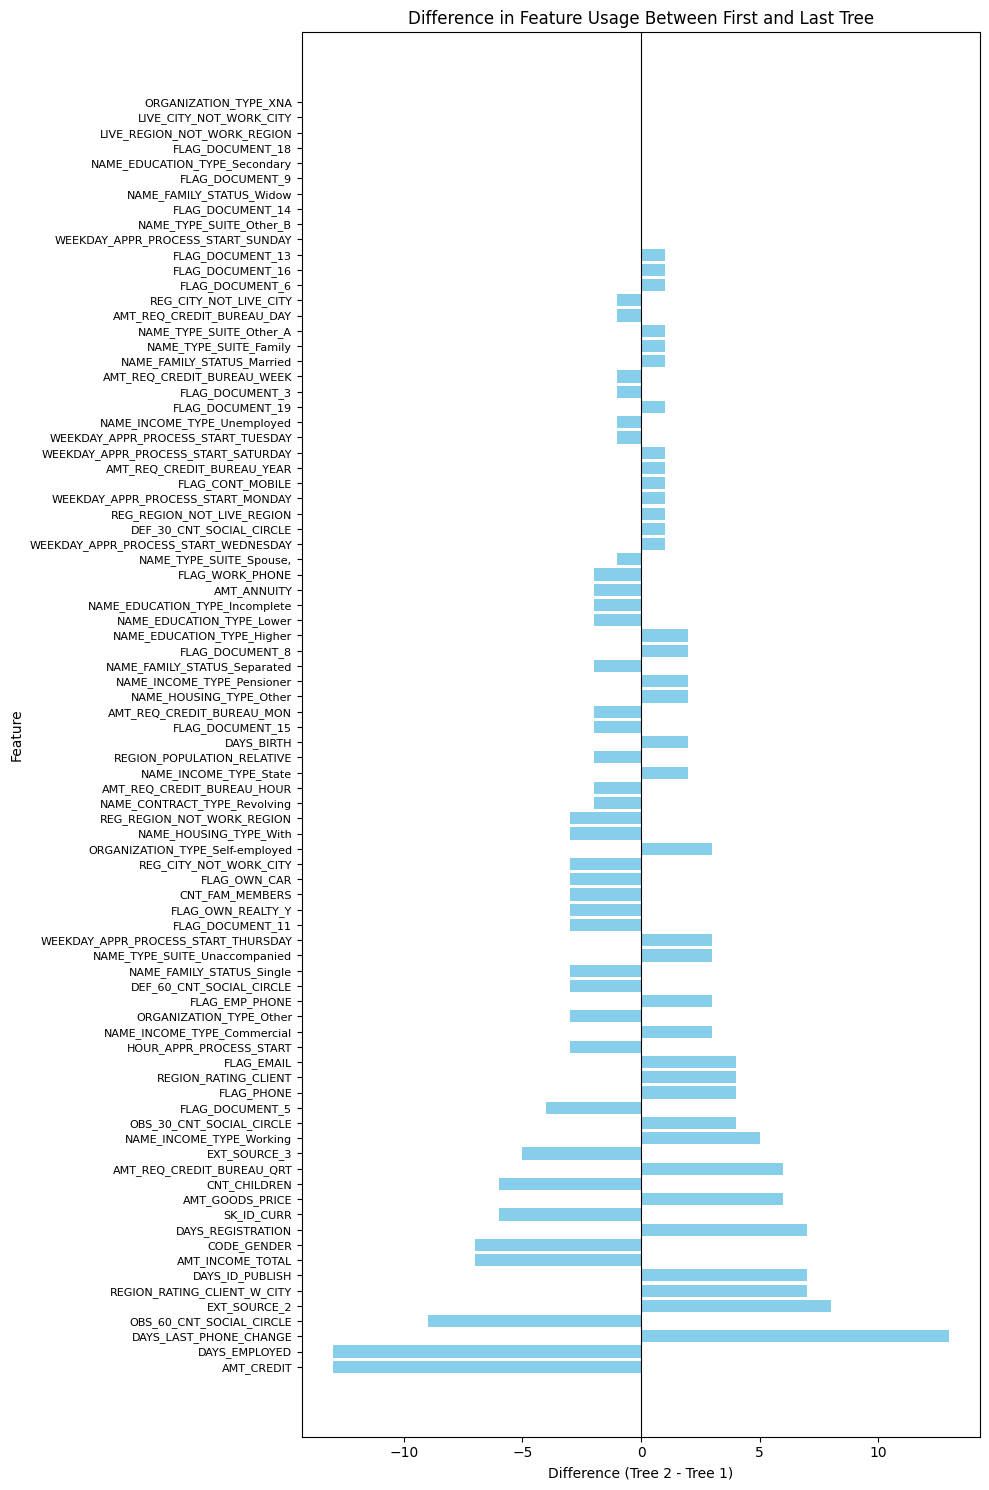

In [32]:
# Sort by absolute difference for better visualization
df_features_sorted = df_features.sort_values(by="Difference", key=abs, ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(df_features_sorted["Feature"], df_features_sorted["Difference"], color="skyblue")
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Difference in Feature Usage Between First and Last Tree")
plt.xlabel("Difference (Tree 2 - Tree 1)")
plt.ylabel("Feature")
plt.gca().tick_params(axis='y', labelsize=8)
plt.tight_layout()
plt.show()

This visualization can help identifying which features gain or lose importance in the two trees.

`AMT_CREDIT` (-13) and `DAYS_EMPLOYED` (-13): Both features saw significant decreases in the last tree, suggesting they were heavily utilized early but became less critical as the forest progressed.

`DAYS_LAST_PHONE_CHANGE` (+13): This feature became much more prominent in the last tree, indicating its increasing relevance in addressing residual errors.

`EXT_SOURCE_2` (+8): Usage increased further in the last tree, reaffirming its importance as a consistently strong predictor.

`EXT_SOURCE_3` (-5): Slightly decreased usage, but it remains among the most significant features.

#E/ Evasion attacks (12pts)

**11.** Implement the Algorithm 2 from the research paper in https://arxiv.org/pdf/1605.07277.pdf

Section 6.5 of the research paper describes the intuition of the algorithm and the different parameters (**5** pts).

PS: the whole paper gives you a good understand of adversarial attacks and is a recommended reading

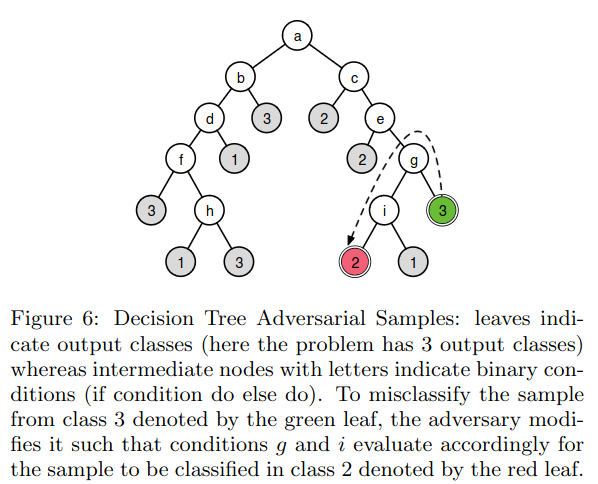

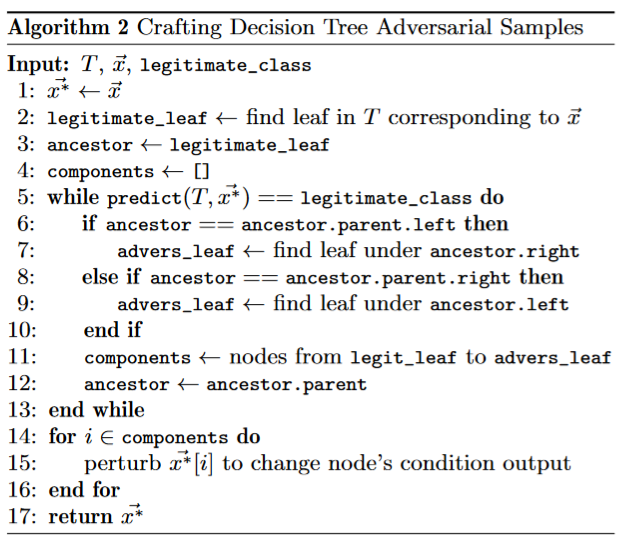

In [ ]:
import numpy as np

def my_decision_tree_attack(model, x):
    """
    Generates an adversarial sample for a decision tree by slightly modifying `x`
    to change its classification outcome.

    Parameters:
    - model: A trained DecisionTreeClassifier or a single tree from a RandomForestClassifier.
    - x: Original input sample (1D numpy array or list of feature values).

    Returns:
    - x_adv: The adversarially modified sample.
    """
    x_adv = x.copy()  # Start with a copy of the original sample
    legitimate_class = model.predict([x])[0]  # Get the original classification

    # Step 1: Find the legitimate leaf node where `x` ends up
    legitimate_leaf = model.apply([x])[0]

    # Step 2: Initialize ancestor node and list of components to store nodes in the adversarial path
    ancestor = legitimate_leaf
    components = []

    # Step 3: While the model still classifies `x_adv` as the legitimate class, attempt to change the path
    while model.predict([x_adv])[0] == legitimate_class:
        # Check if ancestor has a parent node in children_left or children_right
        left_indices = np.where(model.tree_.children_left == ancestor)[0]
        right_indices = np.where(model.tree_.children_right == ancestor)[0]
        
        if left_indices.size > 0:
            parent_id = left_indices[0]
            is_left = True
        elif right_indices.size > 0:
            parent_id = right_indices[0]
            is_left = False
        else:
            # If no parent is found, this might be the root node, which shouldn't happen in the main loop
            break
        
        # Find an adversarial leaf node on the opposite branch
        child_node = model.tree_.children_right[parent_id] if is_left else model.tree_.children_left[parent_id]
        while child_node != -1:
            ancestor = child_node
            child_node = model.tree_.children_left[ancestor] if model.tree_.children_left[ancestor] != -1 else model.tree_.children_right[ancestor]
        advers_leaf = ancestor

        # Add path nodes from legitimate_leaf to advers_leaf to components
        components.append(parent_id)

        # Move up to the parent of ancestor
        ancestor = parent_id

    # Step 4: Perturb `x_adv` to alter decision outcomes for nodes in the path to the adversarial leaf
    for node_id in components:
        feature_index = model.tree_.feature[node_id]
        threshold = model.tree_.threshold[node_id]

        # Adjust the feature value to flip the decision outcome at this node
        if x_adv[feature_index] <= threshold:
            x_adv[feature_index] = threshold + 1e-4
        else:
            x_adv[feature_index] = threshold - 1e-4

    return x_adv

# Example usage:
# We use one of its trees (e.g., the first tree) for the attack
single_tree = optimal_rf.estimators_[0]  # Use the first tree from the Random Forest
x = X_train.iloc[0].values  # Example input sample from the training data

x_adv = my_decision_tree_attack(single_tree, x)
print("Original Class:", single_tree.predict([x])[0])
print("Adversarial Class:", single_tree.predict([x_adv])[0])

Original Class: 1.0
Adversarial Class: 0.0


**12.1** Either using the attack you implemented in question 11. or using the library Adversarial Robustness Toolbox (https://github.com/Trusted-AI/adversarial-robustness-toolbox/), generate a Decision Tree Attack on the validation set on the first tree of the random forest (cf question 10). (**5** pts).


**12.2** Evaluate the AUC on the generated adversarial examples. It should be lower than the AUC obtained on question 8.2. (**2** pts).

In [ ]:
# %pip install adversarial-robustness-toolbox

In [34]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import DecisionTreeAttack
from sklearn.metrics import accuracy_score

# Step 1: Extract the first tree from the Random Forest
single_tree = rf_model_best.estimators_[0]

# Step 2: Wrap the tree with ART's SklearnClassifier
classifier = SklearnClassifier(model=single_tree)

# Step 3: Initialize the Decision Tree Attack
attack = DecisionTreeAttack(classifier=classifier)

# Step 4: Use a subset of the validation set
X_val_sample = X_val[:10].values  # Subset of validation data
y_val_sample = y_val[:10].values  # Corresponding labels

# Step 5: Generate adversarial examples
X_val_adv = attack.generate(X_val_sample)

# Step 6: Evaluate the attack
y_val_pred = single_tree.predict(X_val_sample)  # Predictions on original samples
y_val_adv_pred = single_tree.predict(X_val_adv)  # Predictions on adversarial examples

# Step 7: Compute accuracy before and after the attack
accuracy_before = accuracy_score(y_val_sample, y_val_pred)
accuracy_after = accuracy_score(y_val_sample, y_val_adv_pred)

# Step 8: Display results
print("Accuracy on original validation set:", accuracy_before)
print("Accuracy on adversarial validation set:", accuracy_after)

Decision tree attack: 100%|██████████| 10/10 [00:00<00:00, 108.44it/s]

Accuracy on original validation set: 1.0
Accuracy on adversarial validation set: 0.2


In [35]:
from sklearn.metrics import roc_auc_score

# Predictions on original validation samples
y_val_proba = single_tree.predict_proba(X_val_sample)[:, 1]  # Probability for the positive class

# Predictions on adversarial samples
y_val_adv_proba = single_tree.predict_proba(X_val_adv)[:, 1]  # Probability for the positive class on adversarial samples

# Calculate AUC on original validation set
auc_original = roc_auc_score(y_val_sample, y_val_proba)
print("AUC on Original Validation Set:", auc_original)

# Calculate AUC on adversarial examples
auc_adversarial = roc_auc_score(y_val_sample, y_val_adv_proba)
print("AUC on Adversarial Validation Set:", auc_adversarial)

AUC on Original Validation Set: 1.0
AUC on Adversarial Validation Set: 0.08333333333333331


AUC on adversarial examples should be lower than on original samples if the attack was effective. The results of the AUC evaluation indicate that the first tree in the random forest is highly sensitive to adversarial examples.

In [36]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import DecisionTreeAttack

def evaluate_adversarial_robustness(model, X_val, y_val, subset_size=10):
    tree = model.estimators_[0]
    classifier = SklearnClassifier(model=tree)
    attack = DecisionTreeAttack(classifier=classifier)

    X_val_sample = X_val[:subset_size].values
    y_val_sample = y_val[:subset_size].values
    X_val_adv = attack.generate(X_val_sample)

    y_val_pred = tree.predict(X_val_sample)
    y_val_adv_pred = tree.predict(X_val_adv)

    accuracy_before = accuracy_score(y_val_sample, y_val_pred)
    accuracy_after = accuracy_score(y_val_sample, y_val_adv_pred)

    y_val_proba = tree.predict_proba(X_val_sample)[:, 1]
    y_val_adv_proba = tree.predict_proba(X_val_adv)[:, 1]
    auc_original = roc_auc_score(y_val_sample, y_val_proba)
    auc_adversarial = roc_auc_score(y_val_sample, y_val_adv_proba)

    return accuracy_before, accuracy_after, auc_original, auc_adversarial

rf_model_1 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model_2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

rf_model_1.fit(X_train, y_train)
rf_model_2.fit(X_train, y_train)

results_1 = evaluate_adversarial_robustness(rf_model_1, X_val, y_val)
results_2 = evaluate_adversarial_robustness(rf_model_2, X_val, y_val)

print(f"Model 1 (n_estimators=200, max_depth=20):")
print(f"Accuracy (original): {results_1[0]:.4f}, Accuracy (adversarial): {results_1[1]:.4f}")
print(f"AUC (original): {results_1[2]:.4f}, AUC (adversarial): {results_1[3]:.4f}")

print(f"\nModel 2 (n_estimators=200, max_depth=10):")
print(f"Accuracy (original): {results_2[0]:.4f}, Accuracy (adversarial): {results_2[1]:.4f}")
print(f"AUC (original): {results_2[2]:.4f}, AUC (adversarial): {results_2[3]:.4f}")

accuracy_drop_1 = results_1[0] - results_1[1]
auc_drop_1 = results_1[2] - results_1[3]
accuracy_drop_2 = results_2[0] - results_2[1]
auc_drop_2 = results_2[2] - results_2[3]

print("\nPerformance Drop Comparison:")
print(f"Model 1 - Accuracy Drop: {accuracy_drop_1:.4f}, AUC Drop: {auc_drop_1:.4f}")
print(f"Model 2 - Accuracy Drop: {accuracy_drop_2:.4f}, AUC Drop: {auc_drop_2:.4f}")

Decision tree attack: 100%|██████████| 10/10 [00:00<00:00, 1093.15it/s]

Model 1 (n_estimators=200, max_depth=20):
Accuracy (original): 1.0000, Accuracy (adversarial): 0.2000
AUC (original): 1.0000, AUC (adversarial): 0.0833

Model 2 (n_estimators=200, max_depth=10):
Accuracy (original): 0.6000, Accuracy (adversarial): 0.5000
AUC (original): 0.7500, AUC (adversarial): 0.4167

Performance Drop Comparison:
Model 1 - Accuracy Drop: 0.8000, AUC Drop: 0.9167
Model 2 - Accuracy Drop: 0.1000, AUC Drop: 0.3333


Model 1:
- Accuracy Drop: 0.8000
- AUC Drop: 0.9167
Indicates extreme sensitivity to adversarial perturbations.

Model 2:
- Accuracy Drop: 0.1000
- AUC Drop: 0.3333
Shows better robustness against adversarial examples.

`Model 1`, with higher complexity `(max_depth=20)`, achieves higher performance on the clean validation set but is more vulnerable to adversarial attacks, experiencing severe performance degradation.
`Model 2`, with reduced complexity `(max_depth=10)`, sacrifices some clean-set performance but demonstrates greater robustness against adversarial attacks.
This trade-off between complexity and robustness is critical when designing models for adversarial settings.

#F/ Semi-supervised Learning (8pts)

It is recommended to optimize the hyper parameters of each of the techniques

**13.1** Using LabelPropagation from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

In [11]:
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)

# Split the 10% sample into new training and validation sets (e.g., 80% train, 20% val)
X_train_sample, X_val_sample, y_train_sample, y_val_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)

print(f"New Training Set Shape: {X_train_sample.shape}")
print(f"New Validation Set Shape: {X_val_sample.shape}")

New Training Set Shape: (45229, 98)
New Validation Set Shape: (11308, 98)


In [12]:
from sklearn.semi_supervised import LabelPropagation

model = LabelPropagation(kernel='knn', n_neighbors=7, gamma=0.001)

model.fit(X_train_sample, y_train_sample)

val_predictions = model.predict(X_val_sample)
val_accuracy = accuracy_score(y_val_sample, val_predictions)

print(f"Validation Accuracy with n_neighbors=7 and gamma=0.001: {val_accuracy:.4f}")

Validation Accuracy with n_neighbors=7 and gamma=0.001: 0.5892


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import make_scorer, accuracy_score
import warnings

param_grid = {
    'kernel': ['knn'],
    'gamma': [0.001, 0.01, 0.1],
    'n_neighbors': [5, 7, 10]
}

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_search = GridSearchCV(
        estimator=LabelPropagation(),
        param_grid=param_grid,
        scoring=make_scorer(accuracy_score),
        cv=3,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train_sample, y_train_sample)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

best_model = grid_search.best_estimator_
val_score = best_model.score(X_val_sample, y_val_sample)

print(f"Validation accuracy with best parameters: {val_score:.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'gamma': 0.001, 'kernel': 'knn', 'n_neighbors': 5}
Best cross-validation accuracy: 0.5812
Validation accuracy with best parameters: 0.5942


**13.2** Using LabelSpreading from sklearn library, fit the labels using the validation set and infer the labels of the training set (**3** pts)

**14.** Compare the silhouette performance metrics and the accuracy of the labels of the clusters obtained using each technique. (**2** pts)

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.model_selection import train_test_split

# Split a smaller subset for training and validation
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)
X_train_sample, X_val_sample, y_train_sample, y_val_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)

# Define LabelPropagation and LabelSpreading models with 'knn' and 'rbf' kernels
models = {
    "LabelPropagation (knn)": LabelPropagation(kernel='knn', n_neighbors=5, gamma=0.001),
    "LabelSpreading (knn)": LabelSpreading(kernel='knn', n_neighbors=5, gamma=0.001),
    "LabelPropagation (rbf)": LabelPropagation(kernel='rbf', gamma=0.001),
    "LabelSpreading (rbf)": LabelSpreading(kernel='rbf', gamma=0.001),
}

results = []

for name, model in models.items():
    model.fit(X_val_sample, y_val_sample) 
    train_predictions = model.predict(X_train_sample) 
    val_predictions = model.predict(X_val_sample)

    train_accuracy = accuracy_score(y_train_sample, train_predictions)
    val_accuracy = accuracy_score(y_val_sample, val_predictions)

    combined_data = np.vstack([X_train_sample, X_val_sample])
    combined_labels = np.concatenate([train_predictions, val_predictions])
    silhouette = silhouette_score(combined_data, combined_labels)

    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Val Accuracy": val_accuracy,
        "Silhouette Score": silhouette,
    })

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

/Users/mina/Desktop/3rd_semester/Advanced topics in applied Machine Learning/appliedmlenv/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/mina/Desktop/3rd_semester/Advanced topics in applied Machine Learning/appliedmlenv/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


                    Model  Train Accuracy  Val Accuracy  Silhouette Score
0  LabelPropagation (knn)        0.548166      0.716572          0.019951
1    LabelSpreading (knn)        0.548122      0.716572          0.019985
2  LabelPropagation (rbf)        0.601605      1.000000         -0.029092
3    LabelSpreading (rbf)        0.601605      1.000000         -0.029092


knn Kernel:

Produces more reasonable results overall with moderate validation accuracy (71.6%) and positive silhouette scores.
The weak silhouette scores (close to zero) indicate poor cluster separability but are still better than negative scores.

rbf Kernel:

Overfits the validation set, resulting in perfect accuracy but negative silhouette scores.
Suggests that rbf is unsuitable for this dataset in semi-supervised learning, as it creates overly tight and distorted clusters.